# <font color='red'>TME ROBOTIQUE ET APPRENTISSAGE</font>
# <font color='red'>Optimisation multi-objectif</font>

<font color="red">Version étudiant 2022-2023</font>

*mise à jour: 06/04/2023*

Ce notebook peut être exécuté dans [Google Colab](colab.research.google.com/)

Pour faciliter la lisibilité du notebook, le code donné, à écrire ou à compléter est dans les cellules en annexe, à la fin du notebook. Les cellules de réponses ne doivent contenir que les quelques instructions permettant d'afficher les résultats (éventuellement des appels permettant de les générer) et les commentaires d'analyse associés.

Vous devez déposer votre travail sur Moodle:
* déposer votre notebook, avec le nom de fichier *obligatoirement* au format suivant: **RA_NOM1_NOM2.ipynb**
* toutes les cellules exécutées
* des graphes et un commentaire sur les résultats obtenus
* affichage limité au nécessaire pour assurer la lisibilité du notebook (pas d'affichage de debug ni de centaines de graphes !)

*Le sujet est à faire en binome.*

# COMPLETEZ LES CHAMPS CI-DESSOUS AVEC NOM/PRENOM/CARTE_ETU:

* Étudiant 1: **Fu Zhenyue 28620112**
* Étudiant 2: **Qin Yi 21200081**

## 1. Introduction

Dans ce TME, vous allez mettre en oeuvre des algorithmes évolutionnistes, notamment multi-objectifs pour faire de l'apprentissage. Pour cela, différentes fonctions vous sont fournies afin de tracer les individus générés à chaque génération ou de comparer les résultats entre eux. Vous testerez également Gym, un environnement utilisé en apprentissage par renforcement pour normaliser les expériences d'apprentissage sur des robots (virtuels).

### 1.1 Dépendances

Vous aurez besoin de la bibliothèque DEAP (https://deap.readthedocs.io/en/master/) et d'OpenAI Gym (https://gymnasium.farama.org/).

In [ ]:
# !pip install deap
# !pip install gymnasium
# !pip install scoop


In [17]:
# à exécuter pour pouvoir tracer les courbes demandées
import matplotlib.pyplot as plt

# pour que les figures apparaissent directement dans le notebook
%matplotlib inline 

import random
# ne pas oublier d'initialiser la graine aléatoire...
random.seed()


### 1.2 Scoop

DEAP est compatible avec une bibliothèque de parallisation appelée SCOOP. Elle permet d'évaluer plusieurs solutions en tirant partie des architectures multi-coeur. Cette bibliothèque ne peut malheureusement pas être utilisée dans un notebook. Pour l'utiliser, il faut appeler le programme python en chargeant le module scoop. Depuis une cellule du notebook, cela se fait comme cela:
<pre>!python3 -m scoop programme.py</pre>

Pour permettre son utilisation, les cellules de code en annexe disposent d'une commande "magique" pour à la fois les exécuter et les écrire dans un fichier. Vous pouvez donc les importer ou lancer les programmes soit depuis le notebook, soit depuis un terminal, soit encore depuis le notebook avec un appel de type:
<pre>!python3 programme.py</pre>

**Remarque:** la parallélisation que permet scoop n'est intéressante que si les évaluations sont suffisamment longues. Dans le TME, ce sera intéressant pour les expériences avec Gym, si les temps d'évaluation sont suffisamment longs. 


## 2. Prise en main de DEAP

Dans la suite du TME, vous serez invités à utiliser DEAP, cf https://deap.readthedocs.io/en/master/index.html.

Comme cela a déjà été vu, DEAP est une bibliothèque de prototypage rapide d'algorithmes évolutionnistes. Elle permet de travailler à plusieurs niveaux, depuis l'implémentation complète de l'algorithme à partir de briques de base jusqu'à l'utilisation boite noire d'un algorithme entièrement implémenté et en passant par des approches intermédiaires, dans lesquelles des modules sont réutilisés, par exemple pour la sélection, les mutations ou les croisements.  

### 2.1 Sélection par tournoi

Complétez le code en annexe pour implémenter un algorithme évolutionniste avec une sélection par tournoi qui choisira les parents sur la base de tournois à 3 individus choisis aléatoirement avec une population de taille donnée (les valeurs possibles sont indiquées ci-dessous).

Détails de l'algorithme à implémenter:
- croisement de type SBX (Simulated Binary Crossover), eta=15
- mutation de type polynomiale bornée, eta=15.0 et indpb=1/IND_SIZE (IND_SIZE étant la taille d'un génome)

Voir https://deap.readthedocs.io/en/master/api/tools.html pour les différents opérateurs défini dans DEAP et la documentation associée. Vous utiliserez les fonctions de la toolbox DEAP pour faciliter votre implémentation et vous pourrez vous inspirer des exemples fournis.

Les paramètres seront initialisés entre -5 et 5 (vous pourrez utiliser random.uniform pour l'initialisation).

**Remarque:** la méthode `register` de la toolbox permet d'enregistrer une fonction dans cette toolbox sous un nom donné en premier argument. Le deuxième argument est le nom de la fonction. Les arguments suivants sont optionnels et seront transmis automatiquement à la fonction lorsqu'elle sera appelée (en plus des arguments qui seront éventuellement ajoutés lors de l'appel, par exemple l'individu à muter dans le cas d'une méthode de mutation). Exemple:

In [3]:

def mon_test(a, b):
    print("a=" + str(a) + " b=" + str(b))


toolbox = base.Toolbox()
toolbox.register("test", mon_test, a=3)


a=3 b=4


Les algorithmes évolutionnistes ont une part stochastique et ne donnent donc pas toujours le même résultat. Vous tracerez donc l'évolution de la meilleure fitness pour 10 runs indépendants. Plutôt que de tracer les 10 courbes, vous tracerez la médiane des maxima et un intervalle représentant le 1er et le 3eme quartile. Vous procéderez pour cela de la façon suivante:


    plt.plot(gen,median_max, label="Mediane des max")
    plt.fill_between(gen, fit_25, fit_75, alpha=0.25, linewidth=0)

gen étant une liste de générations, median_max la liste des médianes des maxima et fit_25 et fit_75 les 1er et 3eme quartiles. Vous pourrez les déterminer avec la fonction quantile de numpy: quantile(points, 0.25) et quantile(points, 0.75), avec points une liste qui contient les fitness des différents runs à une génération donnée (il faut donc faire une boucle et appeler ces fonctions pour chaque génération).

Vous testerez votre algorithme sur la fonction de Ackley. Elle est disponible dans DEAP et peut être appelée dans n'importe quelle dimension. Vous pourrez faire vos tests avec la dimension IND_SIZE=10, par exemple. 

Complétez le code en annexe et tracez les courbes pour des populations de taille croissante: [5, 10, 100, 200]. Que constatez-vous ?

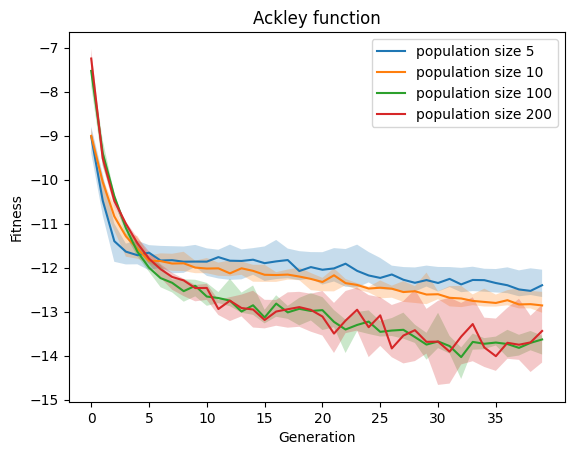

In [11]:
# à compléter pour appeler votre algorithme évolutionniste sur les différentes tailles de population et tracer l'évolution de la fitness moyenne
# Ne pas utiliser SCOOP dans cette question, vous pouvez directement faire appel à votre fonction implémentant l'algorithme évolutionniste

# <INIT_DEAP>
# Code d'initialisation du "créateur" de DEAP, partie à mettre dans le programme principal
# NE PAS MODIFIER
from deap import creator, base

set_creator(creator)

if hasattr(creator, "MaFitness"):
    # Deleting any previous definition (to avoid warning message)
    del creator.MaFitness
creator.create("MaFitness", base.Fitness, weights=(weights))

if hasattr(creator, "Individual"):
    # Deleting any previous definition (to avoid warning message)
    del creator.Individual
creator.create("Individual", list, fitness=creator.MaFitness)
# </INIT_DEAP>

# <ANSWER>
import numpy as np


# Evaluate the function multiple times and plot the median and quartiles
def run_multiple_experiments(n, nbgen, evaluate, IND_SIZE, title, nb_runs=10):
    all_max = np.zeros((nb_runs, nbgen))

    for i in range(nb_runs):
        population, hof, logbook = ea_tournament(
            n, nbgen, evaluate, IND_SIZE, weights=weights
        )
        all_max[i, :] = logbook.select("max")

    median_max = np.median(all_max, axis=0)
    fit_25 = np.quantile(all_max, 0.25, axis=0)
    fit_75 = np.quantile(all_max, 0.75, axis=0)

    gen = range(nbgen)
    plt.plot(gen, median_max, label=f"population size {n}")
    plt.fill_between(gen, fit_25, fit_75, alpha=0.25, linewidth=0)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.xticks(range(0, nbgen, 5))
    plt.title(title)
    plt.legend(loc="upper right")


# Test on Ackley function
from deap.benchmarks import ackley

# Test

for n in [5, 10, 100, 200]:
    run_multiple_experiments(n, 40, ackley, 10, "Ackley function")


# </ANSWER>


Commentaire:
<ANSWER>
À partir du graphique, on peut voir que la courbe descend dans la direction de l'axe des y à mesure que les générations augmentent, et que la médiane de la fitness moyenne se rapproche progressivement de la solution optimale. L'augmentation de la taille de la population contribue à améliorer les performances de l'algorithme. Parmi toutes les tailles de population, l'algorithme avec une population de 100 et 200 a la meilleure performance.
</ANSWER>


### 2.2 Sélection élitiste

Même question mais avec une séleciton de type élitiste: à chaque génération, création de pop_size nouveaux individus (par copie de la population courante, puis mutation de chaque individu avec une probabilité de MUTPB et croisement avec une probabilité de CXPB, vous pourrez utiliser l'algorithme varAnd: https://deap.readthedocs.io/en/master/api/algo.html?highlight=varand#deap.algorithms.varAnd) et sélection des pop_size meilleurs parmi les enfants ainsi générés et leurs parents (Attention: l'appel à la fonction de sélection ne se fera pas au même endroit que pour l'algorithme précédent).

Complétez le code en annexe et tracez les courbes pour des populations de taille croissante: [5, 10, 100, 200]. Que constatez-vous ?

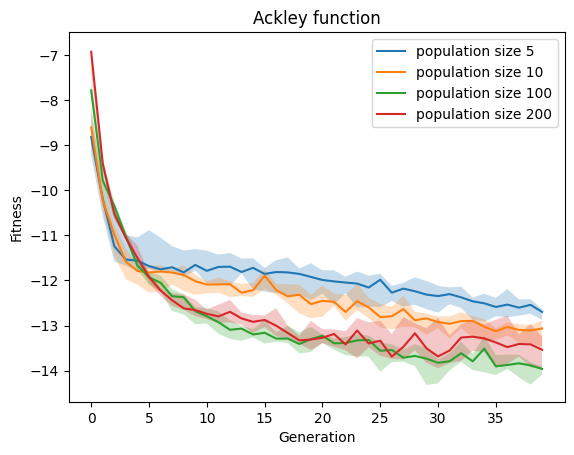

In [24]:
# à compléter pour appeler votre algorithme évolutionniste sur les différentes tailles de population et tracer l'évolution de la fitness moyenne
# Ne pas utiliser SCOOP dans cette question, vous pouvez directement faire appel à votre fonction implémentant l'algorithme évolutionniste


# <INIT_DEAP>
# Code d'initialisation du "créateur" de DEAP, partie à mettre dans le programme principal
# NE PAS MODIFIER
weights = (-1.0,)
from deap import creator, base

set_creator(creator)

if hasattr(creator, "MaFitness"):
    # Deleting any previous definition (to avoid warning message)
    del creator.MaFitness
creator.create("MaFitness", base.Fitness, weights=(weights))

if hasattr(creator, "Individual"):
    # Deleting any previous definition (to avoid warning message)
    del creator.Individual
creator.create("Individual", list, fitness=creator.MaFitness)
# </INIT_DEAP>

# <ANSWER>
import numpy as np


# Evaluate the function multiple times and plot the median and quartiles
def run_multiple_experiments(n, nbgen, evaluate, IND_SIZE, title, nb_runs=10):
    all_max = np.zeros((nb_runs, nbgen))

    for i in range(nb_runs):
        population, hof, logbook = ea_elitist(
            n, nbgen, evaluate, IND_SIZE, weights=weights
        )
        all_max[i, :] = logbook.select("max")

    median_max = np.median(all_max, axis=0)
    fit_25 = np.quantile(all_max, 0.25, axis=0)
    fit_75 = np.quantile(all_max, 0.75, axis=0)

    gen = range(nbgen)
    plt.plot(gen, median_max, label=f"population size {n}")
    plt.fill_between(gen, fit_25, fit_75, alpha=0.25, linewidth=0)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.xticks(range(0, nbgen, 5))
    plt.title(title)
    plt.legend(loc="upper right")


# Test on Ackley function
from deap.benchmarks import ackley

# Test

for n in [5, 10, 100, 200]:
    run_multiple_experiments(n, 40, ackley, 10, "Ackley function")

# </ANSWER>


Commentaire:
<ANSWER>
En regardant les graphiques, on peut voir que l'aptitude diminue progressivement avec l'augmentation du nombre de générations. Cependant, l'algorithme génétique standard avec l'élitisme diminue plus rapidement, convergeant plus rapidement. Les performances sont meilleures pour une population de 100 et 200 individus.
</ANSWER>

**Remarque:** les performances relatives des stratégies de sélection élitiste ou par tournoi dependent des caractéristiques de la fonction à optimiser, ne pas tirer de conclusion trop générales de vos observations.

## 3. Implémentation de NSGA-II

Implémentez maintenant NSGA-II en vous appuyant sur les fonctions fournies dans DEAP (annexe question 2 à compléter). Vous testerez NSGA-II sur un benchmark multi-objectif fourni dans DEAP, par exemple, la fonction de Fonseca et Fleming.

Utilisez l'hypervolume pour caractériser la performance et tracer les courbes avec l'hypervolume (moyenne et 1er-3eme quartiles).

Comme précédemment, tracez l'évolution de l'hypervolume (mediane des max et 1er et 3eme quartiles) pour des populations de taille [5, 10, 100, 200]. 

Que remarquez-vous ?

Dans le cas de la fonction de Fonseca, vous pourrez utiliser (1,1) comme point de référence.

In [8]:
print(
    "Exemple d'utilisation du code de calcul de l'hypervolume. L'hypothèse est celle d'une minimisation."
)
print(
    "Il faut donner un point de référence correspondant, par exemple, aux valeurs maximales pour les objectifs."
)
from deap.tools._hypervolume import hv
import numpy as np

print(
    "Hypervolume: %f"
    % (
        hv.hypervolume(
            [np.array([1, 0]), np.array([1, 1]), np.array([0, 1])], np.array([2, 2])
        )
    )
)


Exemple d'utilisation du code de calcul de l'hypervolume. L'hypothèse est celle d'une minimisation.
Il faut donner un point de référence correspondant, par exemple, aux valeurs maximales pour les objectifs.
Hypervolume: 3.000000


.........+.........+.........+..................+.........+.........+..................+.........+.........+..................+.........+.........+..................+.........+.........+..................+.........+.........+..................+.........+.........+..................+.........+.........+..................+.........+.........+..................+.........+.........+..................+.........+.........+..................+.........+.........+..................+.........+.........+..................+.........+.........+..................+.........+.........+..................+.........+.........+..................+.........+.........+..................+.........+.........+..................+.........+.........+..................+.........+.........+..................+.........+.........+..................+.........+.........+..................+.........+.........+..................+.........+.........+..................+.........+.........+..................+.........+.....

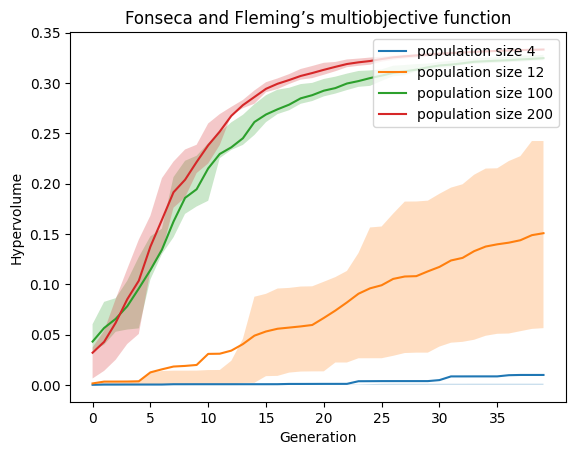

In [25]:
# à compléter pour appeler votre algorithme évolutionniste sur les différentes tailles de population et tracer l'évolution de la fitness moyenne

# <INIT_DEAP>
# Code d'initialisation du "créateur" de DEAP, partie à mettre dans le programme principal
# NE PAS MODIFIER
weights = (-1.0, -1.0)

from deap import creator, base

set_creator(creator)

if hasattr(creator, "MaFitness"):
    # Deleting any previous definition (to avoid warning message)
    del creator.MaFitness
creator.create("MaFitness", base.Fitness, weights=(weights))

if hasattr(creator, "Individual"):
    # Deleting any previous definition (to avoid warning message)
    del creator.Individual
creator.create("Individual", list, fitness=creator.MaFitness)
# </INIT_DEAP>

# <ANSWER>
import numpy as np


# Evaluate the function multiple times and plot the median and quartiles
def run_multiple_experiments(n, nbgen, evaluate, title, nb_runs=10):
    all_hypervolume = np.zeros((nb_runs, nbgen))

    for i in range(nb_runs):
        pop, pf, logbook = nsga2(n, nbgen, evaluate)
        all_hypervolume[i, :] = logbook.select("hypervolume")

    mean_hypervolume = np.mean(all_hypervolume, axis=0)
    q1_hypervolume = np.quantile(all_hypervolume, 0.25, axis=0)
    q3_hypervolume = np.quantile(all_hypervolume, 0.75, axis=0)

    gen = range(nbgen)
    plt.plot(gen, mean_hypervolume, label=f"population size {n}")
    plt.fill_between(gen, q1_hypervolume, q3_hypervolume, alpha=0.25, linewidth=0)
    plt.xlabel("Generation")
    plt.ylabel("Hypervolume")
    plt.xticks(range(0, nbgen, 5))
    plt.title(title)
    plt.legend(loc="upper right")


# Test on Ackley function
from deap.benchmarks import fonseca

# Test

for n in [4, 12, 100, 200]:
    run_multiple_experiments(
        n, 40, fonseca, "Fonseca and Fleming’s multiobjective function"
    )
# </ANSWER>


Commentaire:
<ANSWER>
Au fur et à mesure que le nombre de générations augmente, plus la valeur de l'hypervolume est grande, meilleure est la solution.
Si la taille de la population est plus importante, la convergence est plus rapide et l'intervalle interquartile est plus étroit et plus stable.
</ANSWER>

## 4. Apprentissage de politiques avec gym

L'objectif de cette question est d'utiliser l'algorithme évolutionniste pour apprendre des politiques. Comme lors du TME précédent, vous utiliserez pour cela un problème très simple: le pendule inversé. Il s'agit de contrôler un pendule fixé sur un chariot et capable de tourner. Le chariot peut se déplacer horizontalement. Les mouvements horizontaux du pendule font osciller le pendule et l'objectif est de le maintenir à la verticale.

Les paramètres soumis à l'optimisation par algorithme évolutionniste seront les paramètres de la politique qui contrôle le pendule. Vous pourrez donc réutiliser telles quelles les implémentations que vous venez de réaliser en remplaçant simplement la fonction d'évaluation par une fonction qui calcule la fitness associée à un jeu de paramètre de politiques donné. Cette évaluation sera faite avec OpenAI-Gym. 

OpenAI-gym est un framework permettant d'implémenter des expériences d'apprentissage par renforcement. Il propose une interface simple et unifiée et inclut de nombreux environnements utilisés pour tester des algorithmes d'apprentissage par renforcement. Comme lors du TME précédent, vous utiliserez cet environnement et son module CartPole-v1 pour apprendre à contrôler le pendule (voir https://gym.openai.com/envs/CartPole-v1/). 

Les annexes contiennent:
- `nn.py`: le code associé à une politique représentée sous forme de réseaux de neurones: **NE PAS MODIFIER**
- `cartpole.py`: le squelette de code de la fonction d'évaluation s'appuyant sur Gym: **COMPLÉTER LA CELLULE**
- `cartpole_ea.py`: le squelette de code d'appel à l'algorithme évolutionniste: **COMPLÉTER LA CELLULE**


Vous tracerez dans le notebook l'évolution des fitness comme dans la question précédente. Les calculs étant plus longs, vous pouvez vous limiter à une taille de population et un seul run. Faites en fonction de vos capacités de calcul et, le cas échéant, indiquez en commentaire ce que vous vous attendriez à observer avec une puissance de calcul supérieure. 

Vous choisirez la taille de population et le nombre de d'expériences à réaliser en fonction de la puissance de calcul disponible (des tailles de 100 ou 200 sont souhaitables).

In [ ]:
%%time
!python3 cartpole_ea.py

In [27]:
%%time
!python3 -m scoop cartpole_ea.py

[2023-04-13 01:14:35,057] launcher  INFO    SCOOP 0.7 2.0 on darwin using Python 3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:26:08) [Clang 14.0.6 ], API: 1013
[2023-04-13 01:14:35,057] launcher  INFO    Deploying 10 worker(s) over 1 host(s).
[2023-04-13 01:14:35,057] launcher  INFO    Worker distribution: 
[2023-04-13 01:14:35,057] launcher  INFO       127.0.0.1:	9 + origin
Launching 10 worker(s) using /bin/zsh.
Results in elitist_cartpole/elitist_cartpole_2023_04_13-01:14:35
[2023-04-13 01:15:25,361] brokerzmq (127.0.0.1:62168) ERROR   Could not unpickle status update message.
[2023-04-13 01:15:25,394] brokerzmq (127.0.0.1:62168) ERROR   Could not unpickle status update message.
[2023-04-13 01:15:50,412] brokerzmq (127.0.0.1:62168) ERROR   Could not unpickle status update message.
[2023-04-13 01:16:40,092] launcher  (127.0.0.1:62168) INFO    Root process is done.
[2023-04-13 01:16:40,093] launcher  (127.0.0.1:62168) INFO    Finished cleaning spawned subprocesses.
CPU tim

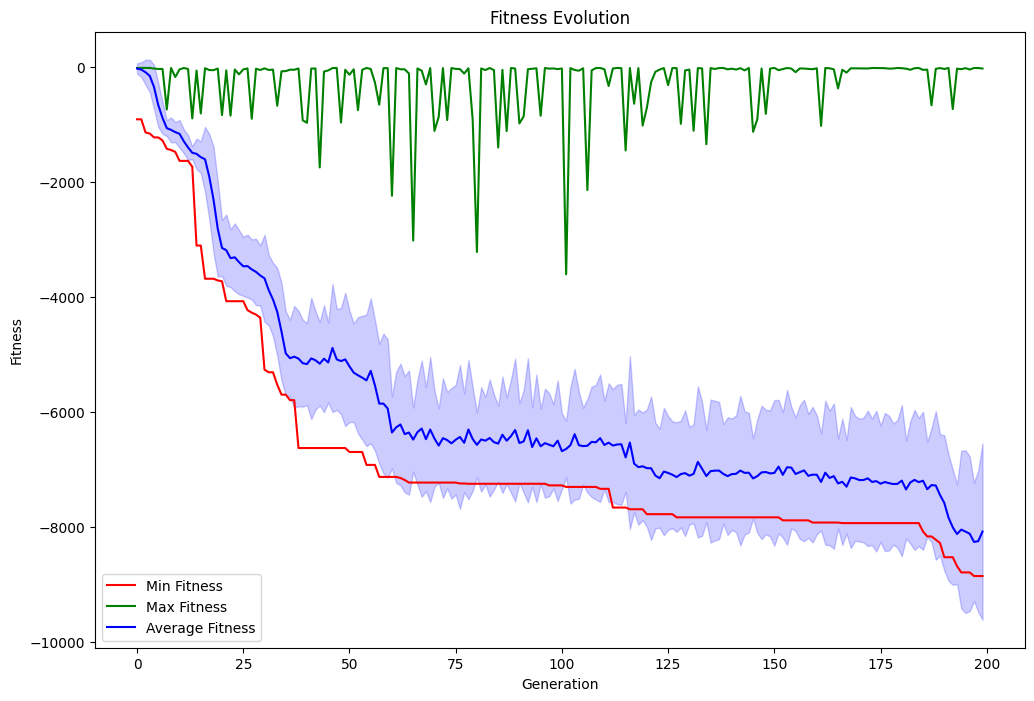

In [28]:
# <ANSWER>
import os
import pickle



experiment_dir = "elitist_cartpole"
nb_runs = len(os.listdir(experiment_dir))

i = 0
for dir in os.listdir(experiment_dir):
    with open(os.path.join(experiment_dir, dir, "logbook.pkl"), "rb") as logbook_file:
        logbook = pickle.load(logbook_file)
    i += 1

    # Extract fitness data from the logbook
    gen_numbers = logbook.select('gen')
    min_fitness = logbook.select('min')
    max_fitness = logbook.select('max')
    avg_fitness = logbook.select('avg')
    std_fitness = logbook.select('std')

    # Plot the fitness evolution
    plt.figure(figsize=(12, 8))
    plt.plot(gen_numbers, min_fitness, label='Min Fitness', color='red')
    plt.plot(gen_numbers, max_fitness, label='Max Fitness', color='green')
    plt.plot(gen_numbers, avg_fitness, label='Average Fitness', color='blue')
    plt.fill_between(
        gen_numbers,
        [avg - std for avg, std in zip(avg_fitness, std_fitness)],
        [avg + std for avg, std in zip(avg_fitness, std_fitness)],
        color='blue',
        alpha=0.2
    )

    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.legend(loc='best')
    plt.title('Fitness Evolution')
    plt.show()


**Remarque**: L'évaluation du pendule commence à une position aléatoire. Affichez plusieurs fois de suite la fitness obtenue en visualisant un même individu. Vous devriez observez que la fitness obtenue n'est pas toujours la même. C'est une illustration du problème de la généralisation. Pendant l'apprentissage, une politique n'a été testée que dans une condition particulière. Si vous changer un peu les conditions, vous n'avez pas de garantie sur ce qu'il va se passer... Pour limiter ce problème, une stratégie simple consiste à calculer la fitness non pas sur une seule évaluation, mais sur plusieurs et à prendre la moyenne (ou la somme) de ces différentes évaluations. Cela devrait réduire la variabilité observée. Si la puissance de calcul dont vous disposez le permet, vous pouvez modifier ainsi votre fontion d'évaluation.

## 5. Apprentissage direct dans l'espace des politiques, version multi-objectif

Le pendule inversé est en fait un problème multi-objectif dans lequel le pendule doit être maintenu à la verticale, le chariot étant centré dans une zone donnée. 

### 5.1 Carpole & NSGA-2

Compléter la cellule de la question 5 pour minimiser l'erreur en x et en theta avec NSGA-2. Comme précédemment, vous tracerez l'évolution de l'hypervolume (prendre un point de référence à [1000, 1000]). 

Vous choisirez la taille de population et le nombre de d'expériences à réaliser en fonction de la puissance de calcul disponible (des tailles de 100 ou 200 sont souhaitables).

In [ ]:
%%time
!python3 cartpole_nsga2.py

In [29]:
%%time
!python3 -m scoop cartpole_nsga2.py

[2023-04-13 01:17:14,950] launcher  INFO    SCOOP 0.7 2.0 on darwin using Python 3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:26:08) [Clang 14.0.6 ], API: 1013
[2023-04-13 01:17:14,950] launcher  INFO    Deploying 10 worker(s) over 1 host(s).
[2023-04-13 01:17:14,950] launcher  INFO    Worker distribution: 
[2023-04-13 01:17:14,950] launcher  INFO       127.0.0.1:	9 + origin
Launching 10 worker(s) using /bin/zsh.
Results in nsga2_cartpole/nsga2_cartpole_2023_04_13-01:17:15
.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........[2023-04-13 01:17:22,674] launcher  (127.0.0.1:62410) INFO    Root process is done.
[2023-04-13 01:17:22,675] launcher  (127.0.0.1:62410) INFO    Finished cleaning spawned subprocesses.
CPU times: user 99.2 ms, sys: 42.3 ms, total: 142 ms
Wall time: 7.91 s


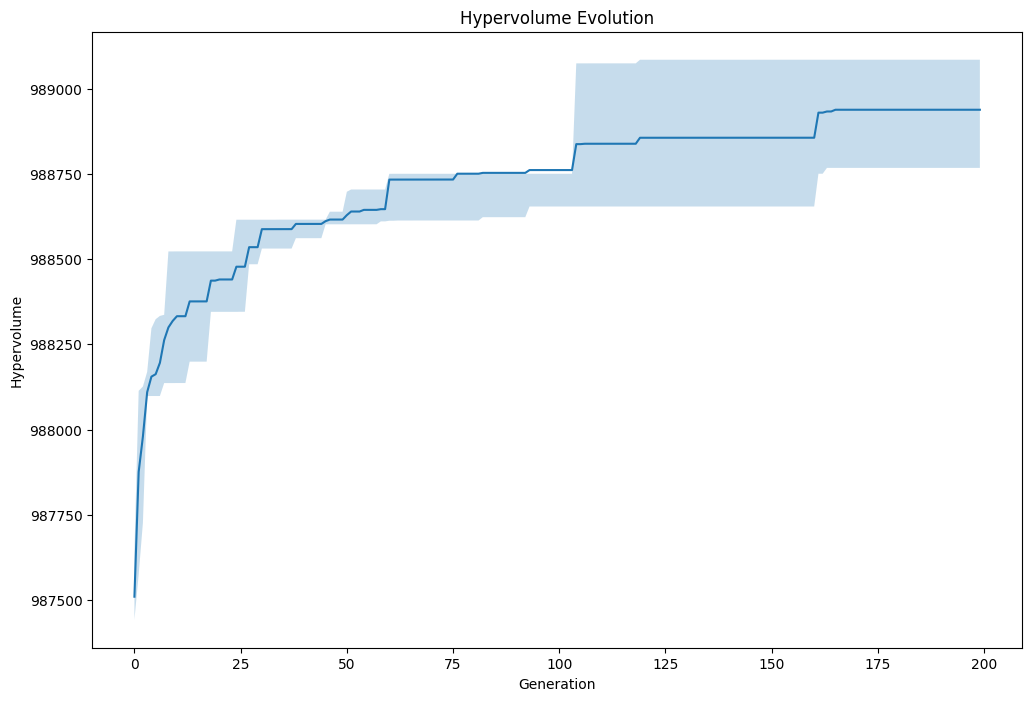

In [30]:
# <ANSWER>
import os
import pickle
import numpy as np


experiment_dir = "nsga2_cartpole"
nb_runs = len(os.listdir(experiment_dir))
n_gen = 200
all_hypervolume = np.zeros((nb_runs, n_gen))
i = 0
for dir in os.listdir(experiment_dir):
    # Load the hypervolume data
    with open(
        os.path.join(experiment_dir, dir, "logbook.pkl"), "rb"
    ) as logbook_file:
        logbook = pickle.load(logbook_file)
    # Extract hypervolume data from the logbook
    hypervolume_data = logbook.select("hypervolume")
    all_hypervolume[i, :] = hypervolume_data
    i += 1

mean_hypervolume = np.mean(all_hypervolume, axis=0)
q1_hypervolume = np.quantile(all_hypervolume, 0.25, axis=0)
q3_hypervolume = np.quantile(all_hypervolume, 0.75, axis=0)


# Plot the hypervolume evolution
plt.figure(figsize=(12, 8))
plt.plot(range(n_gen), mean_hypervolume, label="NSGA-II")
plt.fill_between(
    range(n_gen), q1_hypervolume, q3_hypervolume, alpha=0.25, linewidth=0
)
plt.xlabel("Generation")
plt.ylabel("Hypervolume")
plt.title("Hypervolume Evolution")
plt.show()


### 5.2 Comparaisons entre mono- et multi-objectif

Tracez sur une même figure les valeurs finales atteintes (erreur en x et erreur en theta) pour des expériences en mono-objectif et en multi-objectif. 

Pour les expériences en mono-objectif, vous tracerez un point par expérience.

Pour les expériences en multi-objectif, vous tracerez, pour chaque expérience, l'approximation du front de Pareto obtenue.



In [ ]:
# <ANSWER>

# </ANSWER>


## Annexes

In [2]:
from IPython.core.magic import register_cell_magic


@register_cell_magic
def run_and_save(line, cell):
    print("Run and save python code block to file: " + line)
    with open(line, "wt") as fd:
        fd.write(cell)
    code = compile(cell, line, "exec")
    exec(code, globals())


### Code de la question 2.1

In [13]:
%%run_and_save ea_tournament.py


# <INIT_DEAP>
# Code d'initialisation du "créateur" de DEAP, partie à mettre dans un module
# NE PAS MODIFIER
creator = None
def set_creator(cr):
    global creator
    creator = cr

from deap import base, tools, algorithms
# </INIT_DEAP>

import numpy as np
import random


def ea_tournament(n, nbgen, evaluate, IND_SIZE, MIN_V=-5, MAX_V=5, CXPB=0.5, MUTPB=0.2, weights=(1,)):
    """Algorithme evolutionniste avec sélection par tournoi

    Algorithme evolutionniste avec sélection par tournoi (tournoi sur 3 individus). 
    :param n: taille de la population
    :param nbgen: nombre de generation 
    :param evaluate: la fonction d'évaluation
    :param IND_SIZE: la taille d'un individu
    :param MIN_V: la valeur minimale d'un paramètre du génome
    :param MAX_V: la valeur maximale d'un paramètre du génome
    :param CXPB: la probabilité de croisement
    :param MUTPB: la probabilité de mutation
    :param weights: les poids à utiliser pour la somme pondérée en cas de problème multi-objectif (pour en faire une somme pondérée), ATTENTION, c'est différent du paramètre weights de DEAP qui détermine si c'est une maximisation ou une minimisation 
    """

    #print("EA Tournament: n=%d nbgen=%d, IND_SIZE=%d, MIN_V=%f, MAX_V=%f, CXPB=%f, MUTPB=%f"%(n,nbgen,IND_SIZE, MIN_V, MAX_V, CXPB, MUTPB)+" weights="+str(weights))
    toolbox = base.Toolbox()

    toolbox.register("map",futures.map)
    
    
    # à compléter pour sélectionner les différents opérateurs (dont mutation, croisement, sélection) avec des toolbox.register
    #<ANSWER>

    # Initialisation des opérateurs
    toolbox.register("attr_float", random.uniform, MIN_V, MAX_V)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=IND_SIZE)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evaluate)
    toolbox.register("mate", tools.cxSimulatedBinary, eta=15)
    toolbox.register("mutate", tools.mutPolynomialBounded, eta=15, indpb=1.0/IND_SIZE, low=MIN_V, up=MAX_V)
    toolbox.register("select", tools.selTournament, tournsize=3)

    #</ANSWER>


    # Les statistiques permettant de récupérer les résultats
    stats = tools.Statistics(key=lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # La structure qui permet de stocker les statistiques
    logbook = tools.Logbook()


    # La structure permettant de récupérer le meilleur individu
    hof = tools.HallOfFame(1) 


    population = toolbox.population(n=n)

    # Evaluate the individuals with an invalid fitness
    fitnesses = list(toolbox.map(toolbox.evaluate, population))
    if(len(weights)!=len(fitnesses[0])):
        print("ERROR: the weights and the fitness should have the same size ! weights="+str(weights)+" fitness="+str(fitnesses[0]))
        return
    for ind, fit in zip(population, fitnesses):
        # print("Fit: "+str(fit)) 
        prod=[weights[i]*fit[i] for i in range(len(fit))]
        ind.fitness.values = (sum(prod),) # somme pondérée si fonction à optimiser multi-objectif
        ind.lfit=fit # sauvegarde des valeurs des objectifs
    hof.update(population)
    stat = stats.compile(population)
    logbook.record(gen=0,best=hof[0].lfit,**stat) 
    # le champ "best" pourra être utilisé pour faciliter les comparaisons avec NSGA-2 dans l'expérience multi-objectif de contrôle du pendule (question 5.2)
    
    
    for g in range(1,nbgen):

        # Pour voir l'avancement
        # if (g%10==0):
        #     print("+",end="", flush=True)
        # else:
        #     print(".",end="", flush=True)


        ## à compléter en n'oubliant pas de mettre à jour les statistiques, le logbook et le hall-of-fame comme cela a été fait pour la génération 0

        #<ANSWER>
        # Sélection des individus pour la prochaine génération
        offspring = toolbox.select(population, len(population))
        # Clonage des individus pour éviter la modification de la génération actuelle
        offspring = list(map(toolbox.clone, offspring))

        # Appliquer le croisement et la mutation sur les individus sélectionnés
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Évaluation des individus avec une fitness invalide
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = list(toolbox.map(toolbox.evaluate, invalid_ind))
        for ind, fit in zip(invalid_ind, fitnesses):
            #print("Fit: "+str(fit)) 
            prod=[weights[i]*fit[i] for i in range(len(fit))]
            ind.fitness.values = (sum(prod),) # somme pondérée si fonction à optimiser multi-objectif
            ind.lfit=fit # sauvegarde des valeurs des objectifs
            
        population[:] = offspring
        # Mettre à jour les statistiques
        hof.update(population)
        stat = stats.compile(population)
        logbook.record(gen=g,best=hof[0].lfit,**stat)


        #</ANSWER>
        
    return population, hof, logbook


Run and save python code block to file: ea_tournament.py


## Code de la question 2.2

In [21]:
%%run_and_save ea_elitist.py

import numpy as np
from deap import base, creator, benchmarks
import random
from deap import tools
from scoop import futures

# <INIT_DEAP>
# Code d'initialisation du "créateur" de DEAP, partie à mettre dans un module
# NE PAS MODIFIER
creator = None
def set_creator(cr):
    global creator
    creator = cr

from deap import base, tools, algorithms
# </INIT_DEAP>

def ea_elitist(n, nbgen, evaluate, IND_SIZE, MIN_V=-5, MAX_V=5, CXPB=0.5, MUTPB=0.2, weights=(1,)):
    """Algorithme evolutionniste avec sélection élitiste

    Algorithme evolutionniste avec sélection élitiste. 
    :param n: taille de la population
    :param nbgen: nombre de generation 
    :param evaluate: la fonction d'évaluation
    :param IND_SIZE: la taille d'un individu
    :param MIN_V: la valeur minimale d'un paramètre du génome
    :param MAX_V: la valeur maximale d'un paramètre du génome
    :param CXPB: la probabilité de croisement
    :param MUTPB: la probabilité de mutation
    :param weights: les poids à utiliser pour la somme pondérée en cas de problème multi-objectif (pour en faire une somme pondérée), ATTENTION, c'est différent du paramètre weights de DEAP qui détermine si c'est une maximisation ou une minimisation 
    """

    #print("EA Elitist: n=%d nbgen=%d, IND_SIZE=%d, MIN_V=%f, MAX_V=%f, CXPB=%f, MUTPB=%f"%(n,nbgen,IND_SIZE, MIN_V, MAX_V, CXPB, MUTPB)+" weights="+str(weights))

    toolbox = base.Toolbox()

    toolbox.register("map",futures.map)
    
    # à compléter pour sélectionner les opérateurs de mutation, croisement, sélection avec des toolbox.register(...)
    #<ANSWER>
    toolbox.register("attr_float", random.uniform, MIN_V, MAX_V)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=IND_SIZE)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evaluate)
    toolbox.register("mate", tools.cxSimulatedBinary, eta=15)
    toolbox.register("mutate", tools.mutPolynomialBounded, eta=15, indpb=1.0/IND_SIZE, low=MIN_V, up=MAX_V)
    toolbox.register("select", tools.selTournament, tournsize=3)

    #</ANSWER>


    # Les statistiques permettant de récupérer les résultats
    stats = tools.Statistics(key=lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # La structure qui permet de stocker les statistiques
    logbook = tools.Logbook()


    # La structure permettant de récupérer le meilleur individu
    hof = tools.HallOfFame(1) 

    population = toolbox.population(n=n)
   

    # Evaluate the individuals with an invalid fitness
    fitnesses = list(toolbox.map(toolbox.evaluate, population))
    if(len(weights)!=len(fitnesses[0])):
        print("ERROR: the weights and the fitness should have the same size ! weights="+str(weights)+" fitness="+str(fitnesses[0]))
        return
    spop=[]
    for ind, fit in zip(population, fitnesses):
        prod=[weights[i]*fit[i] for i in range(len(fit))]
        ind.fitness.values = (sum(prod),)
        ind.lfit=fit
        spop.append(fit)
    hof.update(population)
    stat =  stats.compile(population)
    logbook.record(gen=0,pop=spop,best=hof[0].lfit,**stat)
    # le champ "best" pourra être utilisé pour faciliter les comparaisons avec NSGA-2 dans l'expérience multi-objectif de contrôle du pendule (question 5.2)
    
    
    for g in range(1,nbgen):

        # Pour voir l'avancement
        # if (g%10==0):
        #     print("+",end="", flush=True)
        # else:
        #     print(".",end="", flush=True)


        ## à compléter en n'oubliant pas de mettre à jour les statistiques, le logbook et le hall-of-fame comme cela a été fait pour la génération 0

        #<ANSWER>

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population))

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, CXPB, MUTPB)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = list(toolbox.map(toolbox.evaluate, invalid_ind))
        for ind, fit in zip(invalid_ind, fitnesses):
            #print("Fit: "+str(fit)) 
            prod=[weights[i]*fit[i] for i in range(len(fit))]
            ind.fitness.values = (sum(prod),) # somme pondérée si fonction à optimiser multi-objectif
            ind.lfit=fit # sauvegarde des valeurs des objectifs
        
        # add the best back to population:
        offspring.extend(hof.items)

        # Update the hall of fame with the generated individuals
        hof.update(offspring)

        # Replace the current population by the offspring
        
        population[:] = offspring

        # Append the current generation statistics to the logbook
        stat = stats.compile(population)
        logbook.record(gen=g,best=hof[0].lfit,**stat)
        #</ANSWER>
        
    return population, hof, logbook


Run and save python code block to file: ea_elitist.py


## Code de la question 3

In [23]:
%%run_and_save nsga2.py
import numpy as np

# <INIT_DEAP>
# Code d'initialisation du "créateur" de DEAP, partie à mettre dans un module
# NE PAS MODIFIER
creator = None


def set_creator(cr):
    global creator
    creator = cr


from deap import base, tools, algorithms
from deap.benchmarks.tools import hypervolume

# </INIT_DEAP>

from scoop import futures

import random

# ne pas oublier d'initialiser la grane aléatoire (le mieux étant de le faire dans le main))
random.seed()


def nsga2(
    n,
    nbgen,
    evaluate,
    IND_SIZE=5,
    ref_point=None,
    MIN_V=-5,
    MAX_V=5,
    CXPB=0.5,
    MUTPB=0.2,
):
    """NSGA-2

    NSGA-2
    :param n: taille de la population
    :param nbgen: nombre de generation
    :param evaluate: la fonction d'évaluation
    :param IND_SIZE: la taille d'un individu
    :param ref_point: le point de référence pour le calcul de l'hypervolume
    :param MIN_V: la valeur minimale d'un paramètre du génome
    :param MAX_V: la valeur maximale d'un paramètre du génome
    :param CXPB: la probabilité de croisement
    :param MUTPB: la probabilité de mutation
    """

    if ref_point is None:
        ref_point = np.array([1, 1])

    toolbox = base.Toolbox()
    paretofront = tools.ParetoFront()

    # Les statistiques permettant de récupérer les résultats
    stats = tools.Statistics(key=lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # La structure qui permet de stocker les statistiques
    logbook = tools.Logbook()

    # à compléter
    # <ANSWER>
    # Attribute generator
    toolbox.register("attr_float", random.uniform, MIN_V, MAX_V)

    # Structure initializers
    toolbox.register(
        "individual",
        tools.initRepeat,
        creator.Individual,
        toolbox.attr_float,
        n=IND_SIZE,
    )
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    # Operator registering
    toolbox.register(
        "mate", tools.cxSimulatedBinaryBounded, low=MIN_V, up=MAX_V, eta=20.0
    )
    toolbox.register(
        "mutate",
        tools.mutPolynomialBounded,
        low=MIN_V,
        up=MAX_V,
        eta=20.0,
        indpb=1.0 / IND_SIZE,
    )
    toolbox.register("select", tools.selNSGA2)
    toolbox.register("evaluate", evaluate)

    # </ANSWER>

    toolbox.register("map", futures.map)

    population = toolbox.population(n=n)

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        # print("Fit: "+str(fit))
        ind.fitness.values = fit

    paretofront.update(population)

    pffit = []
    for i in paretofront:
        pffit.append(i.fitness.values)

    # This is just to assign the crowding distance to the individuals
    # no actual selection is done
    population = toolbox.select(population, len(population))

    shv = hypervolume(paretofront, ref_point)
    stat = stats.compile(population)
    logbook.record(gen=0, best=pffit, hypervolume=shv, **stat)
    # Le champ best contient la fitness de chaque individu du front de pareto, cela permettra de faciliter les comparaisons pour la question 5.2.

    # Begin the generational process
    for gen in range(1, nbgen):
        if gen % 10 == 0:
            print("+", end="", flush=True)
        else:
            print(".", end="", flush=True)

        ## à compléter en n'oubliant pas de mettre à jour les statistiques, le logbook et le hall-of-fame comme cela a été fait pour la génération 0

        # <ANSWER>
        offspring = tools.selTournamentDCD(population, len(population))

        # Apply crossover and mutation on the offspring
        offspring = algorithms.varAnd(population, toolbox, CXPB, MUTPB)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        # Select the next generation population
        population = toolbox.select(population + offspring, n)
    
        # Update the hall of fame with the generated individuals
        paretofront.update(population)

        pffit = []
        for i in paretofront:
            pffit.append(i.fitness.values)

        # Update the statistics with the new population
        shv = hypervolume(paretofront, ref_point)
        stat = stats.compile(population)
        logbook.record(gen=gen, best=pffit, hypervolume=shv, **stat)

        # </ANSWER>

    return population, paretofront, logbook



Run and save python code block to file: nsga2.py


## Code de la question 4

In [18]:
%%run_and_save nn.py
# NE PAS MODIFIER LE CONTENU DE CETTE CELLULE
# Cette cellule contient le code de gestion d'une politique au travers d'un réseau de neurones de structure fixe. 
# Ce code n'a pas à être modifié ni complété, il suffit d'exécuter la cellule telle quelle.

# coding: utf-8

import numpy as np

## Suppress TF info messages

import os

def sigmoid(x):
    return 1./(1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)


def gen_simplemlp(n_in, n_out, n_hidden_layers=2, n_neurons_per_hidden=5):
    n_neurons = [n_neurons_per_hidden]*n_hidden_layers if np.isscalar(n_neurons_per_hidden) else n_neurons_per_hidden
    i = Input(shape=(n_in,))
    x = i
    for n in n_neurons:
        x = Dense(n, activation='sigmoid')(x)
    o = Dense(n_out, activation='tanh')(x)
    m = Model(inputs=i, outputs=o)
    return m
    

class SimpleNeuralControllerNumpy():
    def __init__(self, n_in, n_out, n_hidden_layers=2, n_neurons_per_hidden=5, params=None):
        self.dim_in = n_in
        self.dim_out = n_out
        # if params is provided, we look for the number of hidden layers and neuron per layer into that parameter (a dicttionary)
        if (not params==None):
            if ("n_hidden_layers" in params.keys()):
                n_hidden_layers=params["n_hidden_layers"]
            if ("n_neurons_per_hidden" in params.keys()):
                n_neurons_per_hidden=params["n_neurons_per_hidden"]
        self.n_per_hidden = n_neurons_per_hidden
        self.n_hidden_layers = n_hidden_layers
        self.weights = None 
        self.n_weights = None
        self.init_random_params()
        self.out = np.zeros(n_out)
        #print("Creating a simple mlp with %d inputs, %d outputs, %d hidden layers and %d neurons per layer"%(n_in, n_out,n_hidden_layers, n_neurons_per_hidden))

    
    def init_random_params(self):
        if(self.n_hidden_layers > 0):
            self.weights = [np.random.random((self.dim_in,self.n_per_hidden))] # In -> first hidden
            self.bias = [np.random.random(self.n_per_hidden)] # In -> first hidden
            for i in range(self.n_hidden_layers-1): # Hidden -> hidden
                self.weights.append(np.random.random((self.n_per_hidden,self.n_per_hidden)))
                self.bias.append(np.random.random(self.n_per_hidden))
            self.weights.append(np.random.random((self.n_per_hidden,self.dim_out))) # -> last hidden -> out
            self.bias.append(np.random.random(self.dim_out))
        else:
            self.weights = [np.random.random((self.dim_in,self.dim_out))] # Single-layer perceptron
            self.bias = [np.random.random(self.dim_out)]
        self.n_weights = np.sum([np.product(w.shape) for w in self.weights]) + np.sum([np.product(b.shape) for b in self.bias])

    def get_parameters(self):
        """
        Returns all network parameters as a single array
        """
        flat_weights = np.hstack([arr.flatten() for arr in (self.weights+self.bias)])
        return flat_weights

    def set_parameters(self, flat_parameters):
        """
        Set all network parameters from a single array
        """
        i = 0 # index
        to_set = []
        self.weights = list()
        self.bias = list()
        if(self.n_hidden_layers > 0):
            # In -> first hidden
            w0 = np.array(flat_parameters[i:(i+self.dim_in*self.n_per_hidden)])
            self.weights.append(w0.reshape(self.dim_in,self.n_per_hidden))
            i += self.dim_in*self.n_per_hidden
            for l in range(self.n_hidden_layers-1): # Hidden -> hidden
                w = np.array(flat_parameters[i:(i+self.n_per_hidden*self.n_per_hidden)])
                self.weights.append(w.reshape((self.n_per_hidden,self.n_per_hidden)))
                i += self.n_per_hidden*self.n_per_hidden
            # -> last hidden -> out
            wN = np.array(flat_parameters[i:(i+self.n_per_hidden*self.dim_out)])
            self.weights.append(wN.reshape((self.n_per_hidden,self.dim_out)))
            i += self.n_per_hidden*self.dim_out
            # Samefor bias now
            # In -> first hidden
            b0 = np.array(flat_parameters[i:(i+self.n_per_hidden)])
            self.bias.append(b0)
            i += self.n_per_hidden
            for l in range(self.n_hidden_layers-1): # Hidden -> hidden
                b = np.array(flat_parameters[i:(i+self.n_per_hidden)])
                self.bias.append(b)
                i += self.n_per_hidden
            # -> last hidden -> out
            bN = np.array(flat_parameters[i:(i+self.dim_out)])
            self.bias.append(bN)
            i += self.dim_out
        else:
            n_w = self.dim_in*self.dim_out
            w = np.array(flat_parameters[:n_w])
            self.weights = [w.reshape((self.dim_in,self.dim_out))]
            self.bias = [np.array(flat_parameters[n_w:])]
        self.n_weights = np.sum([np.product(w.shape) for w in self.weights]) + np.sum([np.product(b.shape) for b in self.bias])
    
    def predict(self,x):
        """
        Propagage
        """
        if(self.n_hidden_layers > 0):
            #Input
            a = np.matmul(x,self.weights[0]) + self.bias[0]
            y = sigmoid(a)
            # hidden -> hidden
            for i in range(1,self.n_hidden_layers-1):
                a = np.matmul(y, self.weights[i]) + self.bias[i]
                y = sigmoid(a)
            # Out
            a = np.matmul(y, self.weights[-1]) + self.bias[-1]
            out = tanh(a)
            return out
        else: # Simple monolayer perceptron
            return tanh(np.matmul(x,self.weights[0]) + self.bias[0])


Run and save python code block to file: nn.py


In [61]:
%%run_and_save cartpole.py
# A COMPLETER
# Squelette du code de réponse à la question 4.

import array
import random

import math
import gymnasium as gym


from nn import SimpleNeuralControllerNumpy

import datetime
import pickle


# Pour récupérer le nombre de paramètre. voir fixed_structure_nn_numpy pour la signification des paramètres. Le TME fonctionne avec ces paramètres là, mais vous pouvez explorer des valeurs différentes si vous le souhaitez.
nn = SimpleNeuralControllerNumpy(4, 1, 2, 5)
IND_SIZE = len(nn.get_parameters())

env = gym.make("CartPole-v1")


def eval_nn(genotype, nbeval=1, render=False, nbstep=1000):
    """Evaluation d'une politique parametrée par le génotype

    Evaluation d'une politique parametrée par le génotype
    :param genotype: le paramètre de politique à évaluer
    :param nbeval: le nombre de répétitions de l'évaluation à réaliser (une évaluation commençant à une position aléatoire)
    :param render: affichage du pendule
    :param nbstep: durée maximale d'une évaluation
    """
    ## à completer

    # ATTENTION: si le pendule tombe (done), vous pouvez interrompre l'évaluation pour accélérer les calculs,
    # mais il faut compléter le calcul d'erreur pour ne pas favoriser ceux qui tombent rapidement...

    # La politique sera être créée avec l'instruction suivante:
    # nn=nn.SimpleNeuralControllerNumpy(4,1,2,5).
    # Vous utiliserez la fonction set_parameters pour positionner ses paramètres à partir du génotype
    # et predict pour calculer l'action suggérée par la politique

    # Le pendule a comme action 0 ou 1 qui correspondra à une force maximale dans un sens ou dans l'autre.
    # L'action sera 0 pour une valeur de sortie négative du réseau de neurones et 1 sinon.

    total_x = 0
    total_theta = 0
    # <ANSWER>
    nn.set_parameters(genotype)
    for _ in range(nbeval):
        observation, _ = env.reset()
        done = False
        t = 0
        while not done and t < nbstep:
            if render:
                env.render()
            action = 0 if nn.predict(observation) < 0 else 1
            observation, _, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_x += abs(observation[0])
            total_theta += abs(observation[2])
            t += 1

    # </ANSWER>
    return (total_x, total_theta)



Run and save python code block to file: cartpole.py


In [26]:
%%writefile cartpole_ea.py
weights = (-1.0,)

from deap import creator, base
from ea_elitist import set_creator, ea_elitist

set_creator(creator)
if hasattr(creator, "MaFitness"):
    # Deleting any previous definition (to avoid warning message)
    del creator.MaFitness
creator.create("MaFitness", base.Fitness, weights=(weights))

if hasattr(creator, "Individual"):
    # Deleting any previous definition (to avoid warning message)
    del creator.Individual
creator.create("Individual", list, fitness=creator.MaFitness)

import nn
import cartpole
import datetime
import pickle
import os


def fitness_function(individual):
    x, theta = cartpole.eval_nn(individual, 10)
    return (x + theta,)


def main():
    pop_size = 100
    num_generations = 200

    population, hof, logbook = ea_elitist(
        n=pop_size,
        nbgen=num_generations,
        evaluate=fitness_function,
        IND_SIZE=IND_SIZE,
        MIN_V=-1,
        MAX_V=1,
        CXPB=0.5,
        MUTPB=0.2,
        weights=weights,
    )

    return population, logbook, hof


if __name__ == "__main__":
    name = "elitist_cartpole"
    d = datetime.datetime.today()
    if not os.path.exists(name):
        os.mkdir(name)
    dir = d.strftime(name + "_%Y_%m_%d-%H:%M:%S")
    dir = os.path.join(name, dir)
    os.mkdir(dir)
    nn = nn.SimpleNeuralControllerNumpy(4, 1, 2, 5)
    IND_SIZE = len(nn.get_parameters())

    print("Results in " + dir)

    # à compléter pour faire appel à un algorithme évolutionniste mono-objectif sur le cartpole.
    # Il est suggéré de sauvegarder le ou les logbook et hof dans le répertoire 'dir'
    # <ANSWER>
    population, logbook, hof = main()

    with open(os.path.join(dir, "logbook.pkl"), "wb") as logbook_file:
        pickle.dump(logbook, logbook_file)
    # </ANSWER>


Overwriting cartpole_ea.py


## Code de la question 5

In [8]:
%%writefile cartpole_nsga2.py

weights = (-1.0, -1.0)

from deap import creator, base
from nsga2 import set_creator, nsga2

set_creator(creator)
if hasattr(creator, "MaFitness"):
    # Deleting any previous definition (to avoid warning message)
    del creator.MaFitness
creator.create("MaFitness", base.Fitness, weights=(weights))

if hasattr(creator, "Individual"):
    # Deleting any previous definition (to avoid warning message)
    del creator.Individual
creator.create("Individual", list, fitness=creator.MaFitness)

import nn
import cartpole
import datetime
import pickle
import os
import numpy as np


def fitness_function(individual):
    x, theta = cartpole.eval_nn(individual, 10)
    return (x, theta)


if __name__ == "__main__":
    name = "nsga2_cartpole"
    d = datetime.datetime.today()
    if not os.path.exists(name):
        os.mkdir(name)
    dir = d.strftime(name + "_%Y_%m_%d-%H:%M:%S")
    dir = os.path.join(name, dir)
    os.mkdir(dir)
    nn = nn.SimpleNeuralControllerNumpy(4, 1, 2, 5)
    IND_SIZE = len(nn.get_parameters())

    print("Results in " + dir)

    # <ANSWER>
    pop_size = 100
    n_gen = 200

    ref_point = np.array([1000, 1000])
    pop, pf, logbook = nsga2(
        n=pop_size,
        nbgen=n_gen,
        evaluate=fitness_function,
        IND_SIZE=IND_SIZE,
        MIN_V=-1,
        MAX_V=1,
        ref_point=ref_point,
    )

    with open(os.path.join(dir, "logbook.pkl"), "wb") as logbook_file:
        pickle.dump(logbook, logbook_file)

    # </ANSWER>


Overwriting cartpole_nsga2.py
